In [194]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [1]:
import requests
import pandas as pd
from sklearn.decomposition import PCA


def stock_to_df(code):
    stock = code
    response = requests.get("https://m.stock.naver.com/api/item/getPriceDayList.nhn?code={}&pageSize=10000&page=1".format(stock))

    df_stock = pd.DataFrame(response.json()["result"]["list"])
    df_stock.index = pd.to_datetime(df_stock["dt"], format="%Y%m%d").reset_index(drop=True)
    df_stock = df_stock.sort_index().drop("dt", axis=1)
    return df_stock

    


kospi_info = pd.read_csv("./market_info/kospi.csv", index_col=0)
kosdaq_info = pd.read_csv("./market_info/kosdaq.csv", index_col=0)
date_info = pd.read_csv("./market_info/date_df.csv", index_col=0)["dt"]
date_info = pd.to_datetime(date_info, format="%Y%m%d").sort_values(ascending=True).reset_index(drop=True)

kospi_list = pd.Series(kospi_info[kospi_info["section"] == 1].index).apply(lambda x: x[1:])
kosdaq_list = pd.Series(kosdaq_info[kosdaq_info["section"] == 1].index).apply(lambda x: x[1:])

df_price_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_price_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)

for x in kospi_list:
    try:
        df_stock = stock_to_df(x)
        df_price_kospi[x] = df_stock["ncv"]
    except Exception as e_1:
        try:
            df_price_kosdaq[x] = df_stock["ncv"]
        except Exception as e_2:
            print(x, e_2)
    print(x, " done.")
    
    
for x in kosdaq_list:
    try:
        df_stock = stock_to_df(x)
        df_price_kosdaq[x] = df_stock["ncv"]
    except Exception as e_1:
        try:
            df_price_kosdaq[x] = df_stock["ncv"]
        except Exception as e_2:
            print(x, e_2)
    print(x, " done.")
        




000020  done.
000040  done.
000050  done.
000060  done.
000070  done.
000075  done.
000080  done.
000087  done.
000100  done.
000105  done.
000120  done.
000140  done.
000145  done.
000150  done.
000155  done.
000157  done.
000180  done.
000210  done.
000215  done.
000220  done.
000225  done.
000227  done.
000230  done.
000240  done.
000270  done.
000300  done.
000320  done.
000325  done.
000370  done.
000390  done.
000400  done.
000430  done.
000480  done.
000490  done.
000500  done.
000520  done.
000540  done.
000545  done.
000547  done.
000590  done.
000640  done.
000650  done.
000660  done.
000670  done.
000680  done.
000700  done.
000720  done.
000725  done.
000760  done.
000810  done.
000815  done.
000850  done.
000860  done.
000880  done.
000885  done.
00088K  done.
000890  done.
000910  done.
000950  done.
000970  done.
000990  done.
000995  done.
001020  done.
001040  done.
001045  done.
001060  done.
001065  done.
001067  done.
001070  done.
001080  done.
001120  done.
001130

NameError: name 'kosdq' is not defined

In [8]:
for x in kosdaq_list:
    try:
        df_stock = stock_to_df(x)
        df_price_kosdaq[x] = df_stock["ncv"]
    except Exception as e_1:
        try:
            df_price_kosdaq[x] = df_stock["ncv"]
        except Exception as e_2:
            print(x, e_2)
    print(x, " done.")

000250  done.
000440  done.
001000  done.
001540  done.
001810  done.
001840  done.
002230  done.
002290  done.
002680  done.
002800  done.
003100  done.
003310  done.
003380  done.
003670  done.
003800  done.
004590  done.
004650  done.
004780  done.
005160  done.
005290  done.
005670  done.
005710  done.
005860  done.
005990  done.
006050  done.
006140  done.
006580  done.
006620  done.
006730  done.
006910  done.
006920  done.
007330  done.
007370  done.
007390  done.
007530  done.
007680  done.
007720  done.
007770  done.
007820  done.
008290  done.
008370  done.
008470  done.
008800  done.
008830  done.
009300  done.
009520  done.
009620  done.
009730  done.
009780  done.
010170  done.
010240  done.
010280  done.
010470  done.
011040  done.
011080  done.
011320  done.
011370  done.
011560  done.
012340  done.
012620  done.
012700  done.
012790  done.
012860  done.
013030  done.
013120  done.
013310  done.
013720  done.
013810  done.
013990  done.
014100  done.
014190  done.
014200

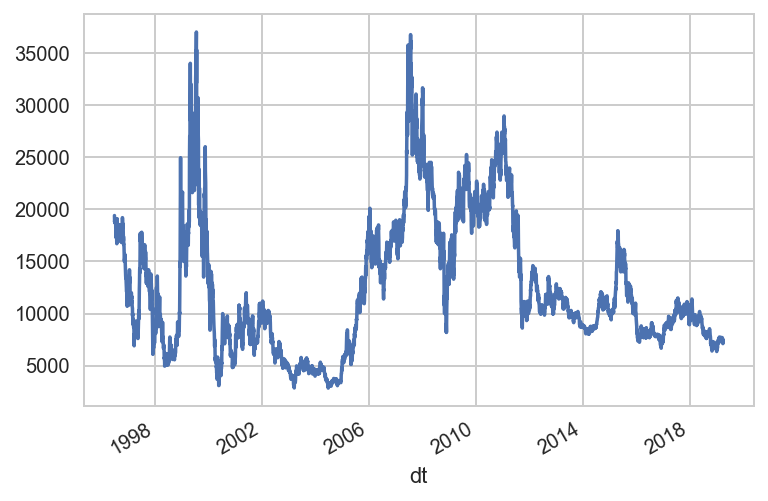

In [117]:
df_price_kospi["006800"].plot()

In [10]:
kospi_rtn = (df_price_kospi / df_price_kospi.shift(1)) - 1

In [15]:
kospi_rtn_09 = kospi_rtn.loc["2009-01-01":, :].dropna(how="all", axis=1)

In [155]:
window = 120

In [167]:
df_alpha = pd.DataFrame(index=kospi_rtn_09.index, columns=kospi_rtn_09.columns)
for x in range(kospi_rtn_09.shape[0] - window):
    target_df = kospi_rtn_09.iloc[x:x+window].dropna(how="all").fillna(0).clip(-0.15, 0.15)
    target_date = target_df.index[-1]
    target_stocks = target_df.columns
    pca_roll = PCA(n_components=30, random_state=0)
    target_return = pca_roll.fit_transform(target_df)
    target_return = pca_roll.inverse_transform(target_return)[-1]
    df_alpha.loc[target_date, target_stocks] = target_return
    if x % 10 == 0:
        print(x)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [184]:
df_alpha_resid = kospi_rtn.clip(-0.3, 0.3) - df_alpha
df_alpha_resid = df_alpha_resid * -1

In [219]:
df_alpha_rank = df_alpha_resid.loc["2010-01-01":"2019-03-29"].rank(axis=1)

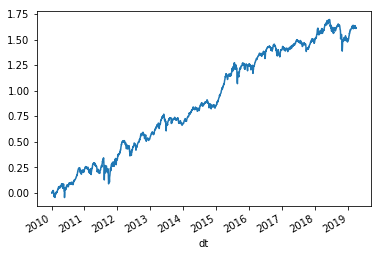

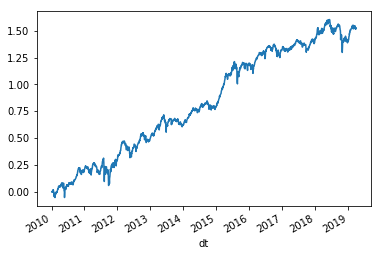

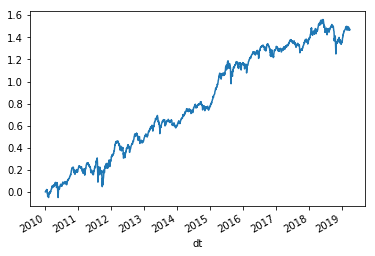

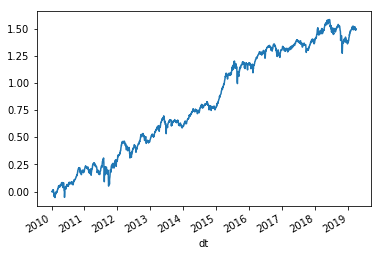

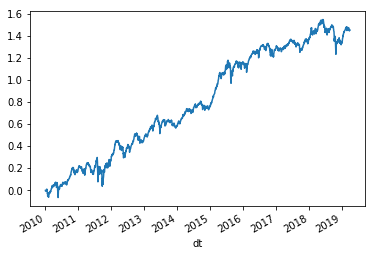

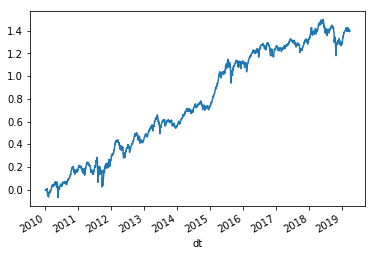

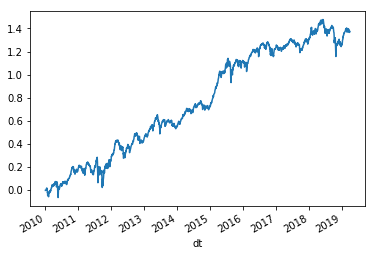

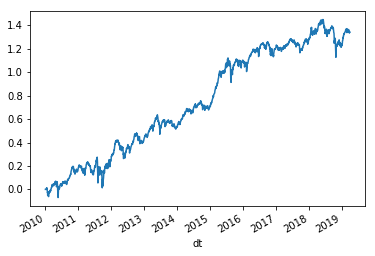

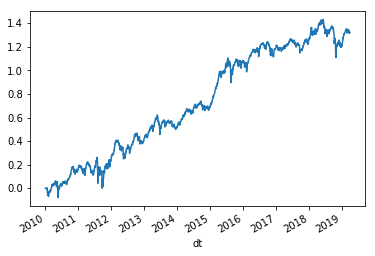

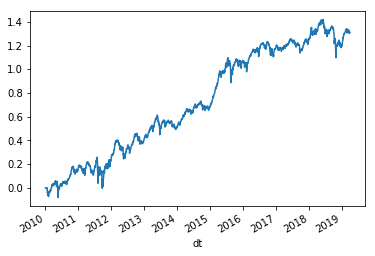

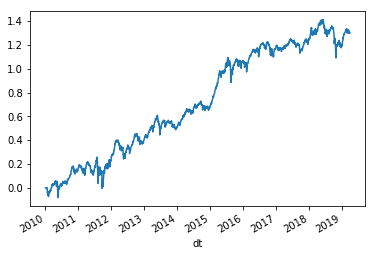

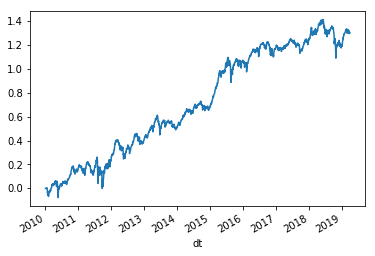

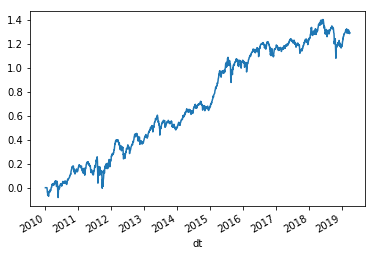

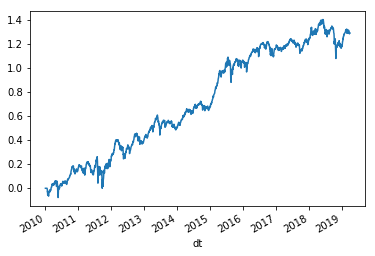

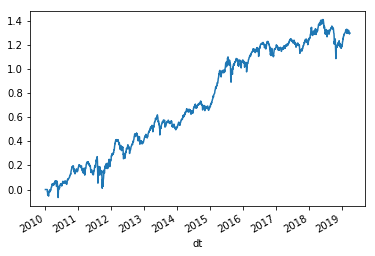

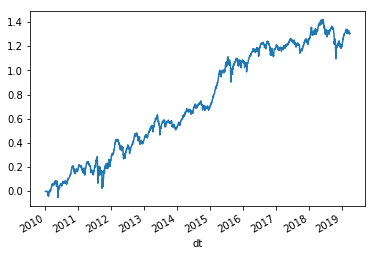

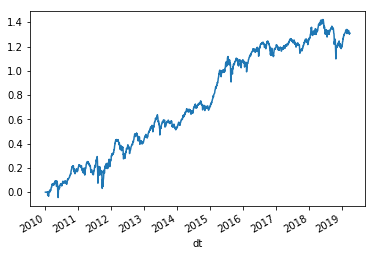

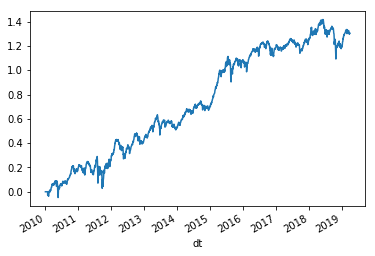

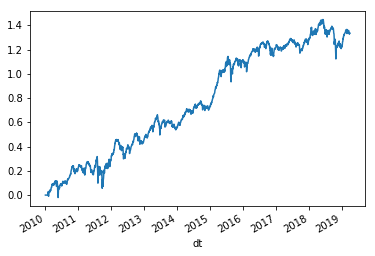

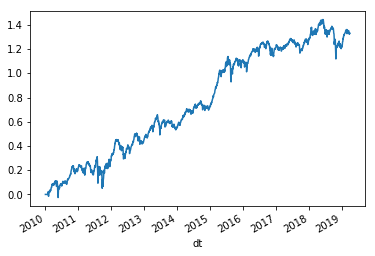

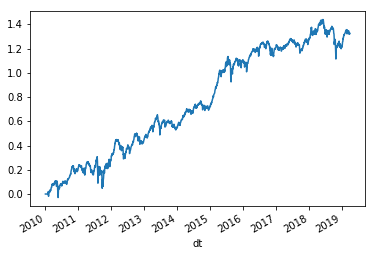

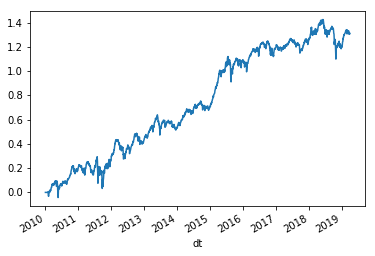

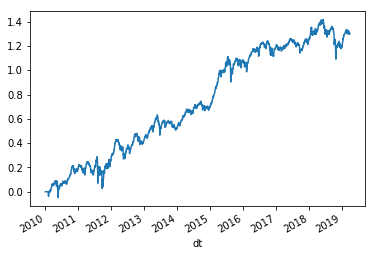

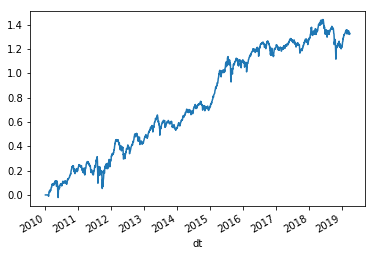

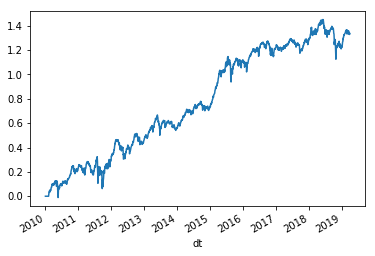

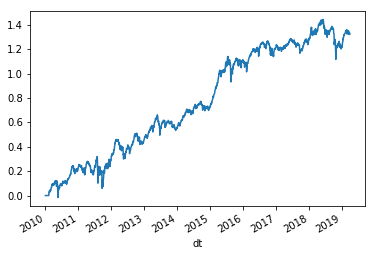

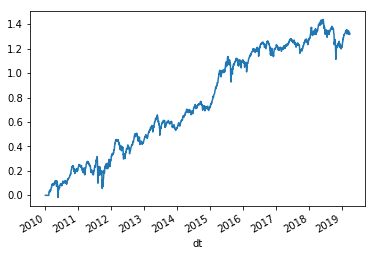

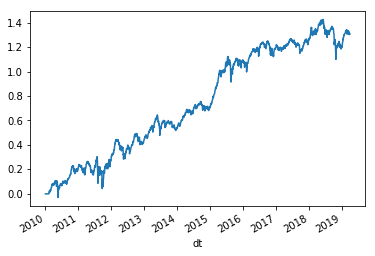

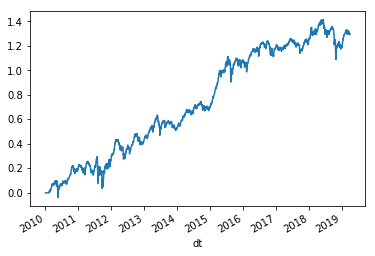

In [220]:
for x in range(1, 30):
    df_alpha_weight = df_alpha_rank.div(df_alpha_rank.sum(axis=1), axis=0).rolling(x).mean()
    (df_alpha_weight.shift(2) * kospi_rtn.loc["2010-01-01":].fillna(0).clip(-0.3, 0.3)).sum(axis=1).cumsum().plot()
    plt.show()

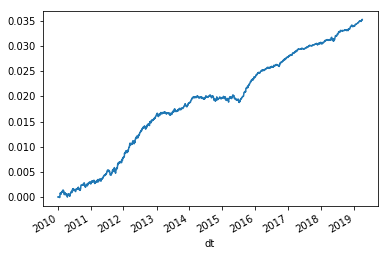

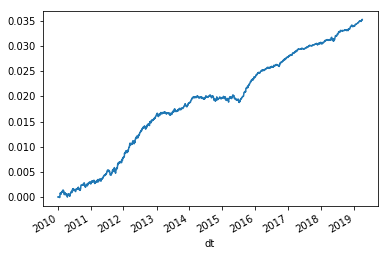

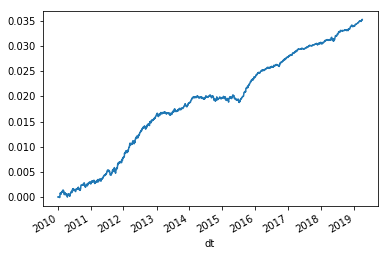

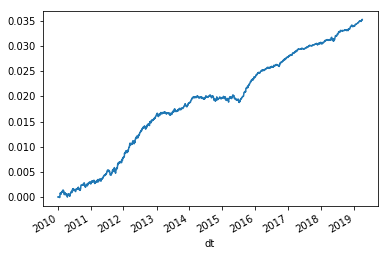

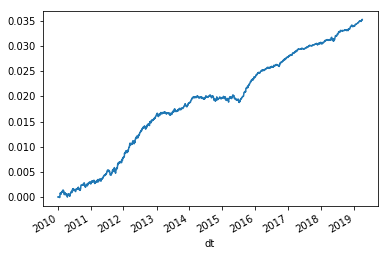

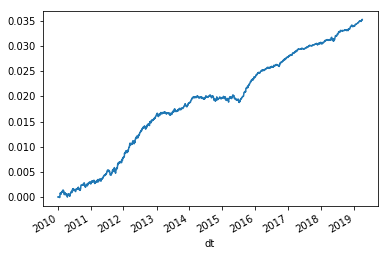

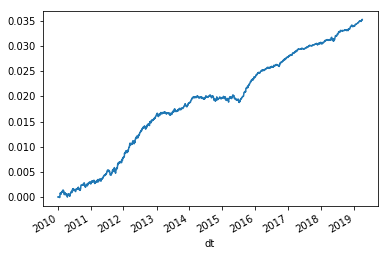

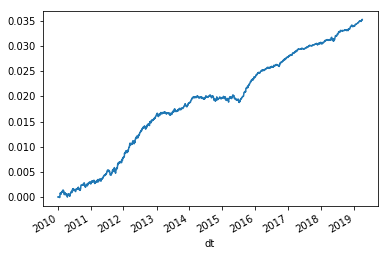

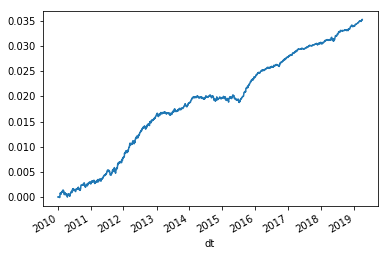

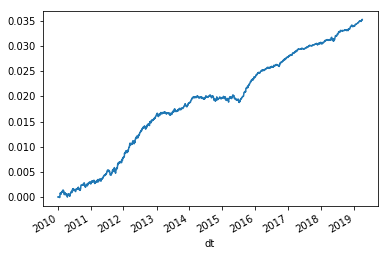

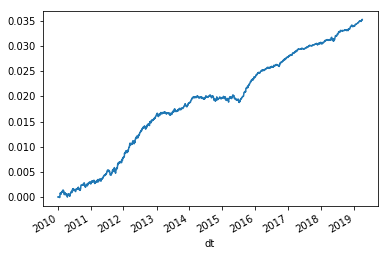

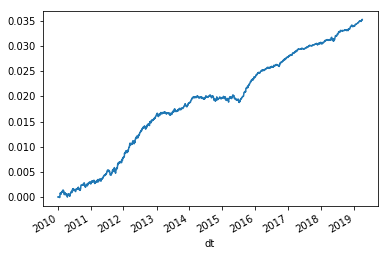

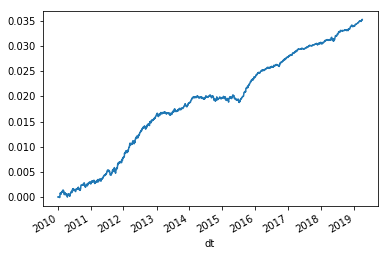

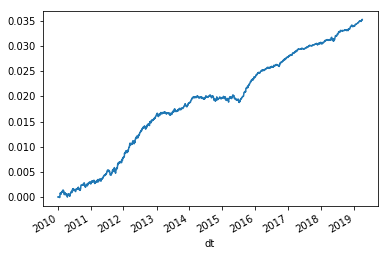

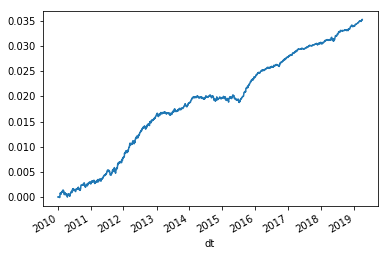

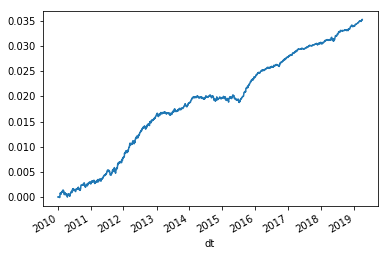

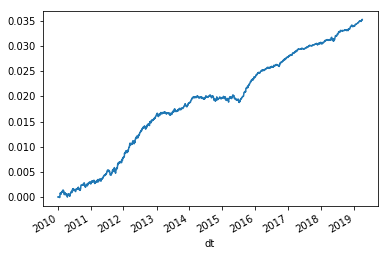

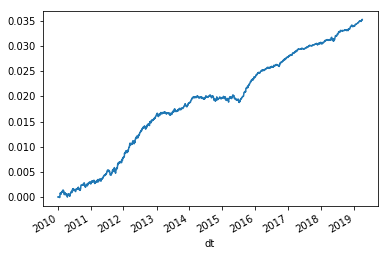

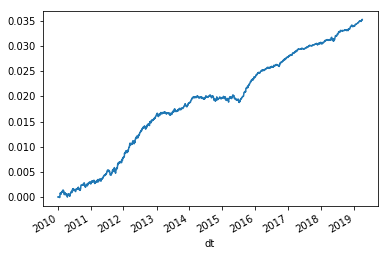

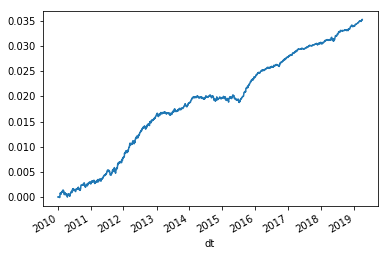

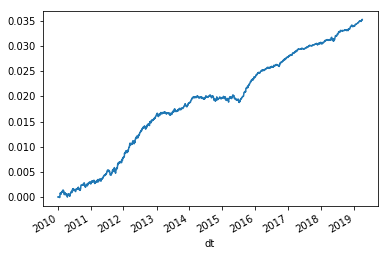

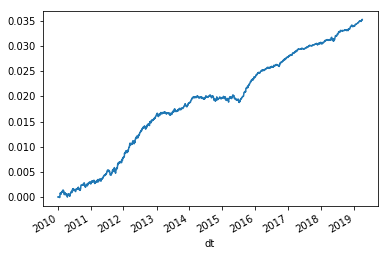

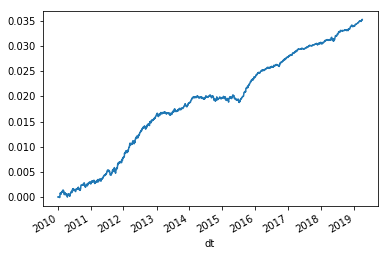

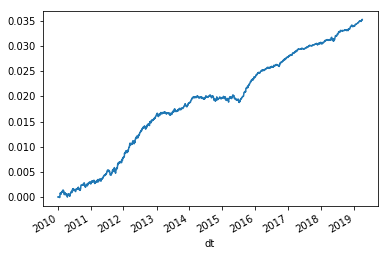

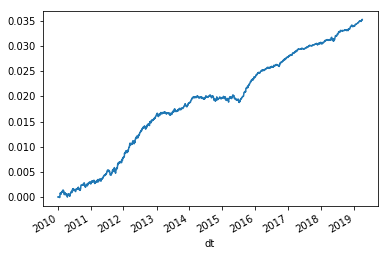

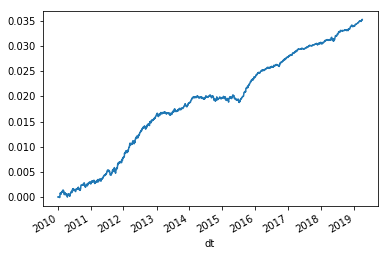

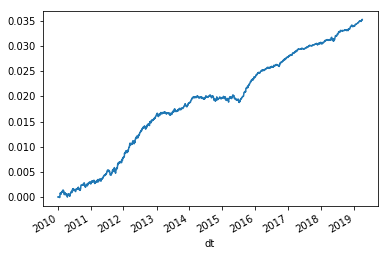

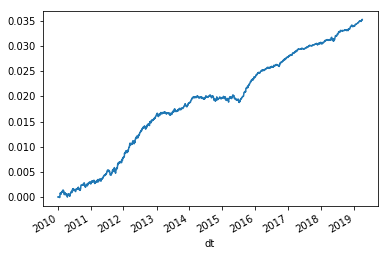

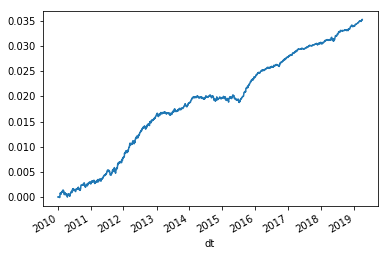

In [217]:
for x in range(1, 30):
    df_alpha_weight = df_alpha_rank.div(df_alpha_rank.sum(axis=1), axis=0).rolling(x).mean()
    (df_alpha_weight_demean.shift(2) * kospi_rtn.loc["2010-01-01":].clip(-0.15, 0.15)).sum(axis=1).cumsum().plot()
    plt.show()

In [63]:
fitted = pca_roll.fit_transform(kospi_rtn_09.shift(1).fillna(0).clip(-0.1, 0.1))

In [64]:
target_return = pd.DataFrame(pca_roll.inverse_transform(fitted))

In [65]:
target_return.index = kospi_rtn_09.index
target_return.columns = kospi_rtn_09.columns

In [66]:
alpha_mx = kospi_rtn_09 - target_return
alpha_mx = alpha_mx.rank(axis=1)
alpha_mx = alpha_mx.div(alpha_mx.sum(axis=1), axis=0)

In [149]:
df_alpha_weight.sub(df_alpha_weight.mean(axis=1), axis=0)

,000020,000040,000050,000060,000070,000075,000080,000087,000100,000105,...,307280,307750,307870,309930,310200,310840,310870,311270,313750,317030
dt,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.000193,0.000144,0.000217,1.277440e-04,-3.757906e-04,-0.000377,-0.000321,-0.000158,0.000115,-0.000337,...,-0.000158,-0.000158,-0.000158,-0.000158,-0.000158,-0.000158,-1.583364e-04,-0.000158,-0.000158,-0.000158
2010-01-05,0.000122,0.000334,0.000303,-3.447848e-04,5.250320e-05,-0.000428,-0.000290,-0.000107,-0.000341,-0.000351,...,-0.000107,-0.000107,-0.000107,-0.000107,-0.000107,-0.000107,-1.072802e-04,-0.000107,-0.000107,-0.000107
2010-01-06,0.000060,-0.000296,0.000194,3.675224e-04,4.464839e-05,0.000084,-0.000288,-0.000124,0.000285,0.000286,...,-0.000124,-0.000124,-0.000124,-0.000124,-0.000124,-0.000124,-1.238166e-04,-0.000124,-0.000124,-0.000124
2010-01-07,0.000206,-0.000119,0.000284,2.773988e-04,2.778122e-04,-0.000193,-0.000182,0.000041,-0.000232,-0.000169,...,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,4.072099e-05,0.000041,0.000041,0.000041
2010-01-08,-0.000343,-0.000372,0.000193,3.567737e-04,-3.216338e-04,0.000117,0.000056,-0.000104,0.000088,0.000108,...,-0.000104,-0.000104,-0.000104,-0.000104,-0.000104,-0.000104,-1.035595e-04,-0.000104,-0.000104,-0.000104
2010-01-11,-0.000406,0.000230,0.000210,3.485055e-04,-3.733102e-04,-0.000324,-0.000277,-0.000105,-0.000356,-0.000266,...,-0.000105,-0.000105,-0.000105,-0.000105,-0.000105,-0.000105,-1.047997e-04,-0.000105,-0.000105,-0.000105
2010-01-12,0.000334,0.000346,-0.000305,-2.782256e-04,-1.240233e-04,0.000244,-0.000176,0.000046,0.000238,0.000199,...,0.000046,0.000046,0.000046,0.000046,0.000046,0.000046,4.609533e-05,0.000046,0.000046,0.000046
2010-01-13,-0.000219,-0.000274,-0.000173,-2.658233e-04,-1.050064e-04,0.000070,0.000375,0.000222,-0.000008,0.000055,...,0.000222,0.000222,0.000222,0.000222,0.000222,0.000222,2.217950e-04,0.000222,0.000222,0.000222
2010-01-14,0.000045,0.000181,-0.000043,3.394105e-04,-3.890198e-04,-0.000030,-0.000364,-0.000209,-0.000017,-0.000367,...,-0.000209,-0.000209,-0.000209,-0.000209,-0.000209,-0.000209,-2.089793e-04,-0.000209,-0.000209,-0.000209


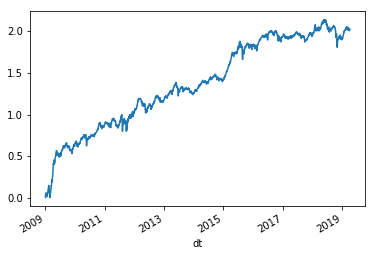

In [81]:
((alpha_mx.shift(1) * (kospi_rtn_09.clip(-0.3, 0.3) + 1)).sum(axis=1).loc["2009-01-05":] - 1).cumsum().plot()

In [42]:
for x in kospi_info["section"].unique():
    print(x, kospi_info[kospi_info["section"] == x].shape[0])

1 884
10 421
4 6
3 6
5 1
2 6
13 1
17 192


In [43]:
for x in kosdaq_info["section"].unique():
    print(x, kosdaq_info[kosdaq_info["section"] == x].shape[0])

1 1315
13 14
6 5
